# Sentiment Analysis and Trading

### Summary Result
- The size of the related keyword data is too small; finetuned with multiple (unrelated) keywords perform better.
- If can collect more related keyword data, it might can improve the model performance.
```
NOTE: 
- related keyword data: the keyword that is related to the stock traded. eg. 2409 -> 友達
```

### Import

In [17]:
%load_ext autoreload
%autoreload 2
from finBert_trading import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Finetuned with only related keyword data
- Backtest with pretrained model 
- Backtest and finetuned the model 

100%|██████████| 1301/1301 [00:01<00:00, 835.22it/s]


Map:   0%|          | 0/262 [00:00<?, ? examples/s]

Map:   0%|          | 0/175 [00:00<?, ? examples/s]

Map:   0%|          | 0/25 [00:00<?, ? examples/s]

Map:   0%|          | 0/62 [00:00<?, ? examples/s]

Average daily return | sentiment: 0.00017610885404825246 | buyhold: 0.0002525772966615835
Std daily return     | sentiment: 0.01287189534275277  | buyhold: 0.01810647269109979


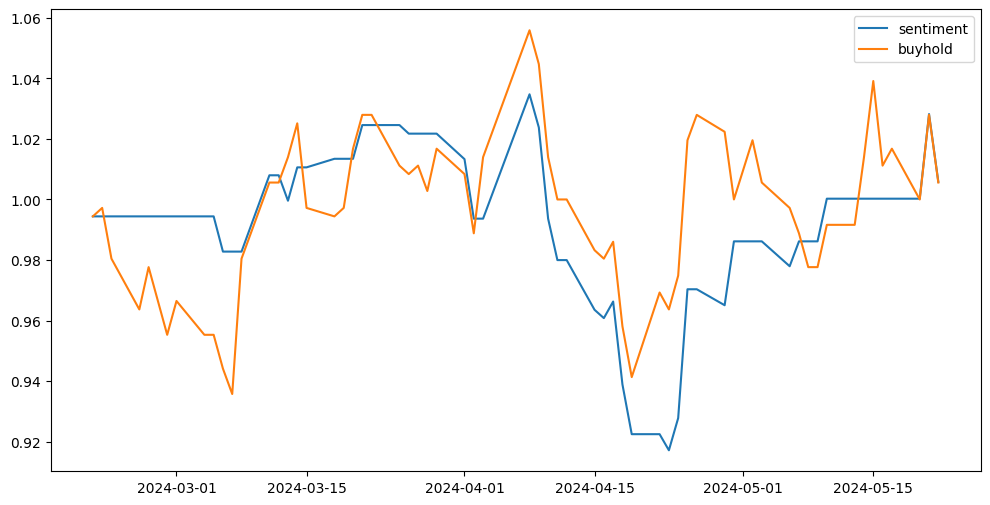

{'eval_loss': 5.992427825927734, 'eval_accuracy': 0.28, 'eval_runtime': 0.4223, 'eval_samples_per_second': 59.196, 'eval_steps_per_second': 2.368, 'epoch': 6.67}
{'eval_loss': 5.788784027099609, 'eval_accuracy': 0.28, 'eval_runtime': 0.4192, 'eval_samples_per_second': 59.643, 'eval_steps_per_second': 2.386, 'epoch': 13.33}
{'eval_loss': 5.455097198486328, 'eval_accuracy': 0.28, 'eval_runtime': 0.4215, 'eval_samples_per_second': 59.309, 'eval_steps_per_second': 2.372, 'epoch': 20.0}
{'eval_loss': 5.006048202514648, 'eval_accuracy': 0.28, 'eval_runtime': 0.4274, 'eval_samples_per_second': 58.499, 'eval_steps_per_second': 2.34, 'epoch': 26.67}
{'eval_loss': 4.438081741333008, 'eval_accuracy': 0.32, 'eval_runtime': 0.419, 'eval_samples_per_second': 59.671, 'eval_steps_per_second': 2.387, 'epoch': 33.33}
{'eval_loss': 3.8955202102661133, 'eval_accuracy': 0.36, 'eval_runtime': 0.423, 'eval_samples_per_second': 59.105, 'eval_steps_per_second': 2.364, 'epoch': 40.0}
{'eval_loss': 3.50052189826

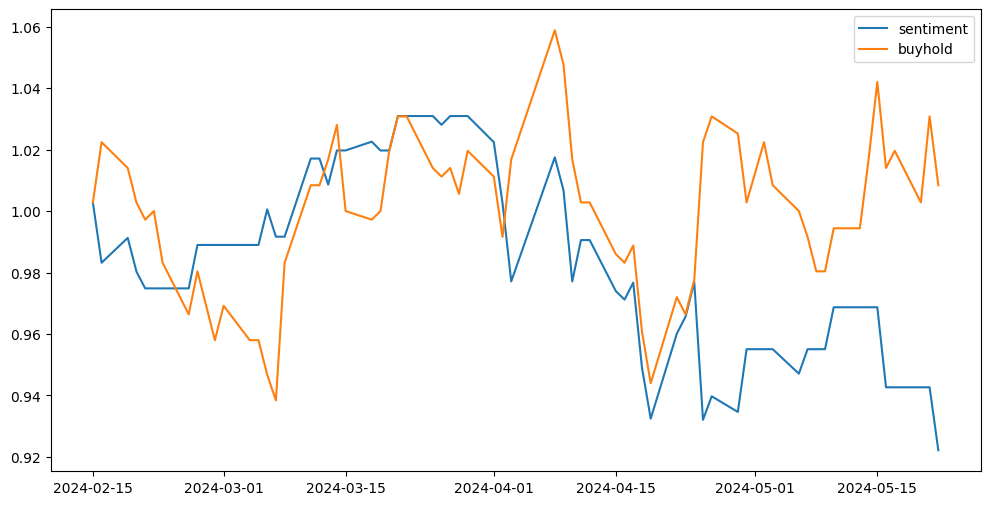

In [18]:
MEDIA = 'UDN'
KEYWORD = '友達'
STOCK = '2409.TW'
DAY_RANGE = '1d'
content_type = 'Title'
"""
NOTE:
- The first file is the target stock
- Train with target stock data and other stock data
"""
filename_news = [
    f'data/TW-stock-news-price/date/NEWS_{MEDIA}_{KEYWORD}_EN.json',
    # 'data/TW-stock-news-price/date/NEWS_UDN_ETF_EN.json'
    ]
filename_price = [
    f'data/TW-stock-news-price/date/PRICE_{STOCK}_{DAY_RANGE}.pickle',
    # 'data/TW-stock-news-price/date/PRICE_0050.TW_1d.pickle'
    ]
filename_log = f'logs/finBert_day_ERROR_{MEDIA}_{KEYWORD}'
senti = finBert_Sentiment(MEDIA, KEYWORD, STOCK, DAY_RANGE, content_type, filename_news, filename_price, filename_log)
senti.set_seeds()

all, train, val, test = senti.load_data(text_type = 'title')
senti.evaluate_with_pretrained()
result = senti.finetuneFull_score_trade(True)
# result = senti.finetuneLora_score_trade(True)

### Finetuned with multiple (not related) keyword data
- Backtest with pretrained model 
- Backtest and finetuned the model 

100%|██████████| 6623/6623 [00:06<00:00, 976.92it/s] 


Map:   0%|          | 0/262 [00:00<?, ? examples/s]

Map:   0%|          | 0/383 [00:00<?, ? examples/s]

Map:   0%|          | 0/25 [00:00<?, ? examples/s]

Map:   0%|          | 0/62 [00:00<?, ? examples/s]

Average daily return | sentiment: 0.00017610885404825246 | buyhold: 0.0002525772966615835
Std daily return     | sentiment: 0.01287189534275277  | buyhold: 0.01810647269109979


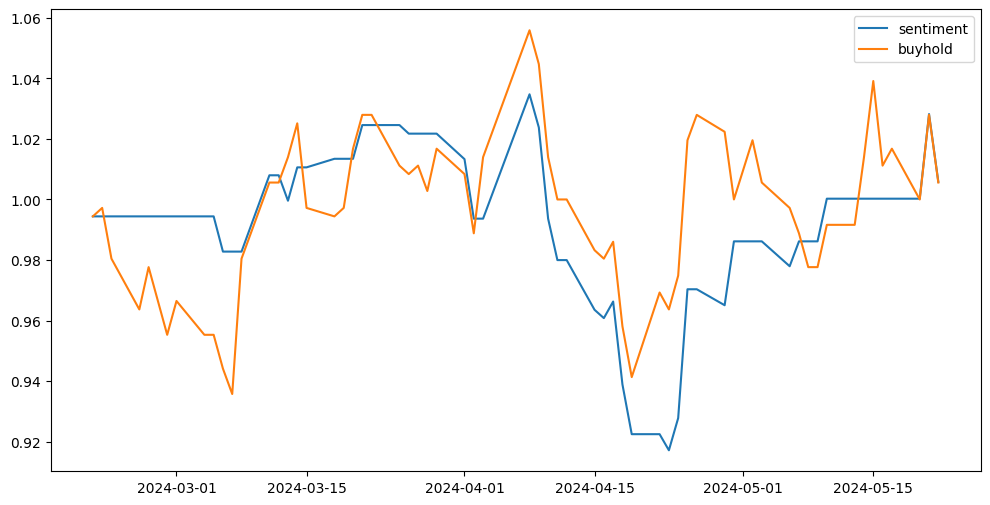

{'eval_loss': 5.98354959487915, 'eval_accuracy': 0.28, 'eval_runtime': 0.248, 'eval_samples_per_second': 100.797, 'eval_steps_per_second': 4.032, 'epoch': 3.33}
{'eval_loss': 5.756399631500244, 'eval_accuracy': 0.28, 'eval_runtime': 0.2504, 'eval_samples_per_second': 99.853, 'eval_steps_per_second': 3.994, 'epoch': 6.67}
{'eval_loss': 5.3896355628967285, 'eval_accuracy': 0.32, 'eval_runtime': 0.2517, 'eval_samples_per_second': 99.316, 'eval_steps_per_second': 3.973, 'epoch': 10.0}
{'eval_loss': 4.887191295623779, 'eval_accuracy': 0.32, 'eval_runtime': 0.2529, 'eval_samples_per_second': 98.837, 'eval_steps_per_second': 3.953, 'epoch': 13.33}
{'eval_loss': 4.282532215118408, 'eval_accuracy': 0.32, 'eval_runtime': 0.2524, 'eval_samples_per_second': 99.047, 'eval_steps_per_second': 3.962, 'epoch': 16.67}
{'eval_loss': 3.6841373443603516, 'eval_accuracy': 0.4, 'eval_runtime': 0.2514, 'eval_samples_per_second': 99.46, 'eval_steps_per_second': 3.978, 'epoch': 20.0}
{'eval_loss': 3.15941834449

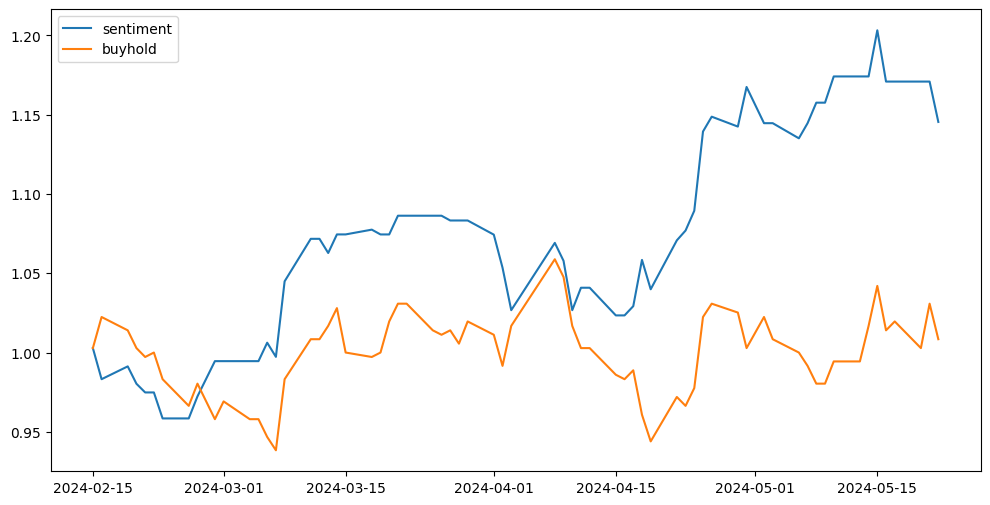

In [19]:
MEDIA = 'UDN'
KEYWORD = '友達'
STOCK = '2409.TW'
DAY_RANGE = '1d'
content_type = 'Title'
"""
NOTE:
- The first file is the target stock
- Train with target stock data and other stock data
"""
filename_news = [
    f'data/TW-stock-news-price/date/NEWS_{MEDIA}_{KEYWORD}_EN.json',
    'data/TW-stock-news-price/date/NEWS_UDN_ETF_EN.json'
    ]
filename_price = [
    f'data/TW-stock-news-price/date/PRICE_{STOCK}_{DAY_RANGE}.pickle',
    'data/TW-stock-news-price/date/PRICE_0050.TW_1d.pickle'
    ]
filename_log = f'logs/finBert_day_ERROR_{MEDIA}_{KEYWORD}'
senti = finBert_Sentiment(MEDIA, KEYWORD, STOCK, DAY_RANGE, content_type, filename_news, filename_price, filename_log)
senti.set_seeds()

all, train, val, test = senti.load_data(text_type = 'title')
senti.evaluate_with_pretrained()
result = senti.finetuneFull_score_trade(True)
# result = senti.finetuneLora_score_trade(True)